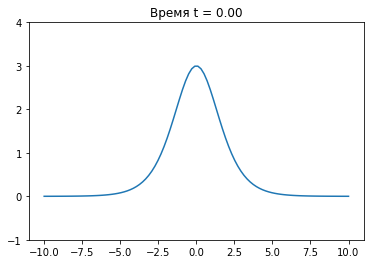

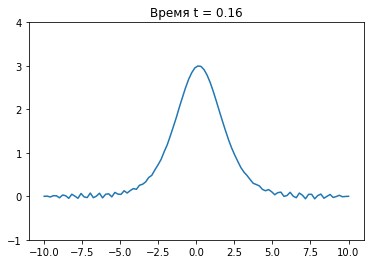

/tmp/ipykernel_411416/1686092030.py:24: RuntimeWarning: overflow encountered in multiply
  U = U - dt * (U * ddx(U, dx) + V * dddx(U, dx))
/tmp/ipykernel_411416/1686092030.py:17: RuntimeWarning: invalid value encountered in subtract
  return (np.roll(u, -1) - np.roll(u, 1)) / (2*dx)
/tmp/ipykernel_411416/1686092030.py:20: RuntimeWarning: invalid value encountered in subtract
  return (np.roll(u, -2) - 2 * np.roll(u, -1) + 2 * np.roll(u, 1) - np.roll(u, 2)) / (2*dx**3)
/tmp/ipykernel_411416/1686092030.py:20: RuntimeWarning: invalid value encountered in add
  return (np.roll(u, -2) - 2 * np.roll(u, -1) + 2 * np.roll(u, 1) - np.roll(u, 2)) / (2*dx**3)
/tmp/ipykernel_411416/1686092030.py:24: RuntimeWarning: invalid value encountered in add
  U = U - dt * (U * ddx(U, dx) + V * dddx(U, dx))
/tmp/ipykernel_411416/1686092030.py:24: RuntimeWarning: invalid value encountered in subtract
  U = U - dt * (U * ddx(U, dx) + V * dddx(U, dx))


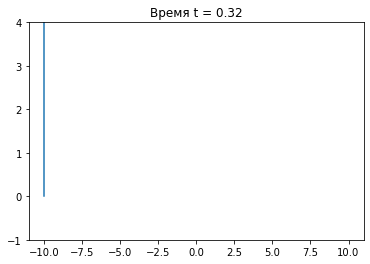

/tmp/ipykernel_411416/1686092030.py:24: RuntimeWarning: overflow encountered in multiply
  U = U - dt * (U * ddx(U, dx) + V * dddx(U, dx))
/tmp/ipykernel_411416/1686092030.py:20: RuntimeWarning: invalid value encountered in subtract
  return (np.roll(u, -2) - 2 * np.roll(u, -1) + 2 * np.roll(u, 1) - np.roll(u, 2)) / (2*dx**3)
/tmp/ipykernel_411416/1686092030.py:24: RuntimeWarning: invalid value encountered in add
  U = U - dt * (U * ddx(U, dx) + V * dddx(U, dx))


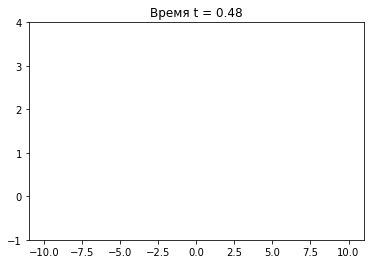

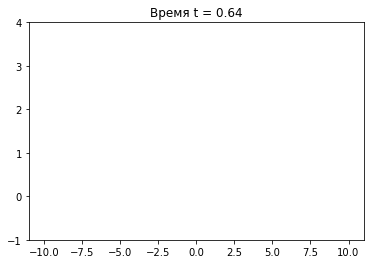

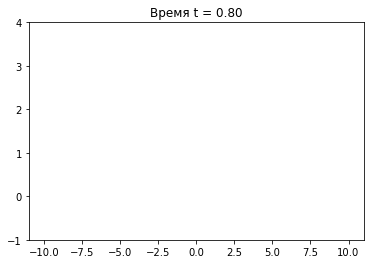

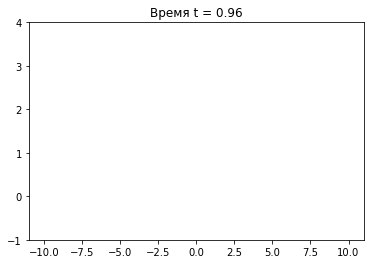

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Параметры
L = 20 # Длина интервала
N = 100 # Количество точек сетки
dx = L / N # Шаг по пространству
dt = dx**3 / 5 # Шаг по времени из условия Куранта
a = -10 # Левая граница
b = 10 # Правая граница
T = 1 # Время симуляции
V = 1 # Скорость волнового пакета
d = 2 # Определено из b = V = 1 как указано
X = np.linspace(a, b, N)
U = 3 * V / (np.cosh(X / d)**2) # Начальное условие
def ddx(u, dx):
    # Производная по пространству с периодическими граничными условиями
    return (np.roll(u, -1) - np.roll(u, 1)) / (2*dx)
def dddx(u, dx):
    # Третья производная по пространству с периодическими граничными условиями
    return (np.roll(u, -2) - 2 * np.roll(u, -1) + 2 * np.roll(u, 1) - np.roll(u, 2)) / (2*dx**3)
# Временная эволюция
for n in range(int(T/dt)):
    # Обновление волнового поля
    U = U - dt * (U * ddx(U, dx) + V * dddx(U, dx))
    # Граничные условия
    U[0] = 3 * V / (np.cosh(a / d)**2)
    U[-1] = 3 * V / (np.cosh(b / d)**2)
    # Визуализация каждые 100 шагов
    if n % 100 == 0:
        plt.plot(X, U)
        plt.ylim(-1, 4)
        plt.title(f'Время t = {n*dt:.2f}')
        plt.draw()
        plt.pause(0.1)
        plt.show()